**Working on smaller chunk of data**

**train_sample & test**

**Data fields** : Each row of the training data contains a click record, with the following features.

1. ip: ip address of click.
2. app: app id for marketing.
3. device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
4. os: os version id of user mobile phone
5. channel: channel id of mobile ad publisher
6. click_time: timestamp of click (UTC)
7. attributed_time: if user download the app for after clicking an ad, this is the time of the app download
8. is_attributed: the target that is to be predicted, indicating the app was downloaded

Note that ip, app, device, os, and channel are encoded.

In [34]:
import pandas as pd
train = pd.read_csv('train_sample.csv')
test = pd.read_csv('test.csv')

In [35]:
print(train.shape)
print(test.shape)

(100000, 8)
(18790469, 7)


In [36]:
train.apply(lambda x: sum(x.isnull()))

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [38]:
train.sample(5)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
51965,13368,10,1,6,317,2017-11-07 13:38:11,NaN,0
61050,40912,3,1,36,280,2017-11-08 01:24:18,NaN,0
4294,43855,2,1,37,477,2017-11-09 10:43:07,NaN,0
71776,299504,3,1,32,371,2017-11-09 08:08:16,NaN,0
37039,191894,20,2,15,259,2017-11-06 16:23:47,NaN,0


In [39]:
train[train['attributed_time'].notnull()].sample(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
41695,166691,19,0,24,213,2017-11-07 11:40:49,2017-11-07 11:41:50,1
70506,174091,5,1,30,113,2017-11-07 08:35:54,2017-11-07 08:36:30,1
19629,32463,19,188,29,213,2017-11-07 00:16:23,2017-11-07 04:09:58,1
46475,137168,19,60,38,213,2017-11-07 01:33:50,2017-11-07 01:34:22,1
36469,15195,3,1,32,114,2017-11-08 01:17:20,2017-11-08 01:17:35,1
28269,4865,19,0,24,213,2017-11-09 02:11:00,2017-11-09 02:12:43,1
39247,305220,19,581,24,213,2017-11-09 15:03:23,2017-11-09 15:05:43,1
73589,313069,19,0,866,282,2017-11-09 05:27:17,2017-11-09 05:28:52,1
47813,94466,29,1,9,213,2017-11-07 15:35:15,2017-11-07 15:36:50,1
85077,272464,5,1,30,113,2017-11-08 14:27:49,2017-11-08 14:28:21,1


In [40]:
for c in train.columns:
    if c != 'ip':
        print(train[c].value_counts())
        print('*'*50)
#better way is to plot it

3      18279
12     13198
2      11737
9       8992
15      8595
18      8315
14      5359
1       3135
13      2422
8       2004
21      1979
11      1927
26      1633
23      1454
6       1303
64      1079
7        981
20       911
25       804
28       720
24       704
27       696
19       478
10       388
22       386
17       380
29       360
32       286
5        188
151      109
       ...  
551        1
168        1
105        1
233        1
302        1
78         1
112        1
115        1
116        1
372        1
123        1
124        1
548        1
100        1
163        1
99         1
97         1
96         1
31         1
347        1
91         1
538        1
474        1
536        1
216        1
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64
**************************************************
1       94338
2        4345
0         541
3032      371
3543      151
3866       93
59         12
6           8
16     

In [41]:
train['XX'] = pd.to_datetime(train['click_time'], format="%Y-%m-%d %H:%M:%S")

In [42]:
train['XX'].dt.weekday.value_counts()

2    34035
1    32393
3    28561
0     5011
Name: XX, dtype: int64

In [43]:
test.sample(5)

,click_id,ip,app,device,os,channel,click_time
1892397,1892397,57283,11,1,13,325,2017-11-10 04:33:22
9887074,9887074,75899,5,1,32,377,2017-11-10 10:13:37
13602962,13602962,18834,3,1,41,489,2017-11-10 13:24:48
97558,97558,37682,2,1,19,212,2017-11-10 04:01:44
4386588,4386588,76919,3,1,8,137,2017-11-10 05:21:00


In [44]:
test['X'] = pd.to_datetime(test['click_time'], format="%Y-%m-%d %H:%M:%S")

In [45]:
test['X'].dt.day.value_counts()

10    18790469
Name: X, dtype: int64

In [46]:
##since test dataset doesn't samples from different date that is not there in train dataset, weekday and date won't help
#train['date'] = pd.to_datetime(train['click_time'], format="%Y-%m-%d %H:%M:%S").dt.day
train['hour'] = pd.to_datetime(train['click_time'], format="%Y-%m-%d %H:%M:%S").dt.hour
train['minute'] = pd.to_datetime(train['click_time'], format="%Y-%m-%d %H:%M:%S").dt.minute
#train['weekDay'] = pd.to_datetime(train['click_time'], format="%Y-%m-%d %H:%M:%S").dt.weekday
train.dtypes

ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
click_time                 object
attributed_time            object
is_attributed               int64
XX                 datetime64[ns]
hour                        int64
minute                      int64
dtype: object

In [47]:
train.drop(['click_time','attributed_time','XX'], axis=1, inplace=True)
train.dtypes

ip               int64
app              int64
device           int64
os               int64
channel          int64
is_attributed    int64
hour             int64
minute           int64
dtype: object

In [48]:
test['hour'] = pd.to_datetime(test['click_time'], format="%Y-%m-%d %H:%M:%S").dt.hour
test['minute'] = pd.to_datetime(test['click_time'], format="%Y-%m-%d %H:%M:%S").dt.minute
test.dtypes

click_id               int64
ip                     int64
app                    int64
device                 int64
os                     int64
channel                int64
click_time            object
X             datetime64[ns]
hour                   int64
minute                 int64
dtype: object

In [49]:
test.drop(['click_time','X'], axis=1, inplace=True)
test.dtypes

click_id    int64
ip          int64
app         int64
device      int64
os          int64
channel     int64
hour        int64
minute      int64
dtype: object

**Data fields** : Each row of the training data contains a click record, with the following features.

1. ip: ip address of click.
2. app: app id for marketing.
3. device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
4. os: os version id of user mobile phone
5. channel: channel id of mobile ad publisher
6. click_time: timestamp of click (UTC)
7. attributed_time: if user download the app for after clicking an ad, this is the time of the app download
8. is_attributed: the target that is to be predicted, indicating the app was downloaded

'app', 'channel', 'time' are critical

In [50]:
train['app'].corr(train['channel'])

-0.028237659717744154

In [51]:
#import seaborn as sns
#sns.pairplot(train[['channel','app']])

In [52]:
train[['channel','app']].sample(10)

,channel,app
26263,245,15
47858,459,64
7516,116,22
88108,280,17
82644,245,12
26512,439,18
75954,107,18
84867,459,6
67094,130,3
18102,430,15


# **parameter tuning

In [53]:
X = train.drop(['is_attributed'], axis=1)
y = train['is_attributed']
print(X.shape)
print(y.shape)

(100000, 7)
(100000,)


In [54]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [55]:
Xtrain.dtypes

ip         int64
app        int64
device     int64
os         int64
channel    int64
hour       int64
minute     int64
dtype: object

In [56]:
ytrain.dtypes

dtype('int64')

In [57]:
Xtrain.shape

(75000, 7)

In [58]:
Xtest.shape

(25000, 7)

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [60]:
%time model.fit(Xtrain, ytrain)

Wall time: 330 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
%time ypred = model.predict(Xtest)

Wall time: 4 ms


In [62]:
from sklearn.metrics import roc_curve, auc

falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytest, ypred)

rocAUC = auc(falsePositiveRate, truePositiveRate)
print(rocAUC)

0.6477739853051396


**max_depth**

<function matplotlib.pyplot.show>

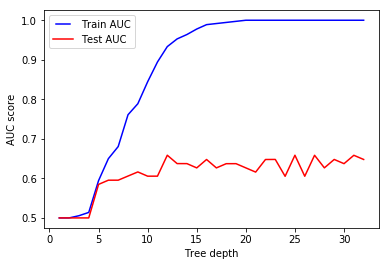

In [63]:
import numpy as np
import matplotlib.pyplot as plt

max_depths = np.linspace(1, 32, 32, endpoint=True)
trainResults = [] 
testResults = []
for max_depth in max_depths:
    dt1 = DecisionTreeClassifier(max_depth=max_depth)
    dt1.fit(Xtrain, ytrain)
    
    trainPred = dt1.predict(Xtrain)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytrain, trainPred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    trainResults.append(rocAUC)
    
    ypred = dt1.predict(Xtest)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytest, ypred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    testResults.append(rocAUC)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, trainResults, 'b', label="Train AUC")
line2, = plt.plot(max_depths, testResults, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show

**min_samples_split**

<function matplotlib.pyplot.show>

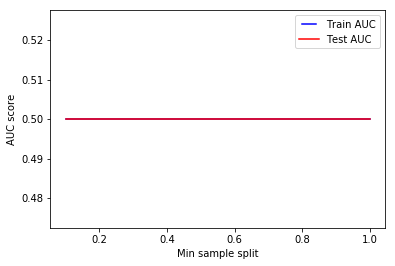

In [76]:
import numpy as np
import matplotlib.pyplot as plt

min_sample_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

trainResult = []
testResult = []
for sampleSplit in min_sample_splits:
    dt2 = DecisionTreeClassifier(min_samples_split=sampleSplit)
    dt2.fit(Xtrain, ytrain)
    
    trainPred = dt2.predict(Xtrain)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytrain, trainPred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    trainResult.append(rocAUC)
    
    ypred = dt2.predict(Xtest)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytest, ypred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    testResult.append(rocAUC)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_sample_splits, trainResult, 'b', label="Train AUC")
line2, = plt.plot(min_sample_splits, testResult, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Min sample split')
plt.show

**min_samples_leaf**

<function matplotlib.pyplot.show>

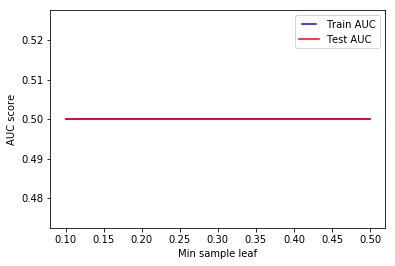

In [77]:
import numpy as np
import matplotlib.pyplot as plt

min_sample_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

trainResult = []
testResult = []
for sampleLeaf in min_sample_leafs:
    dt3 = DecisionTreeClassifier(min_samples_leaf=sampleLeaf)
    dt3.fit(Xtrain, ytrain)
    
    trainPred = dt3.predict(Xtrain)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytrain, trainPred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    trainResult.append(rocAUC)
    
    ypred = dt3.predict(Xtest)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytest, ypred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    testResult.append(rocAUC)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_sample_leafs, trainResult, 'b', label="Train AUC")
line2, = plt.plot(min_sample_leafs, testResult, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Min sample leaf')
plt.show

**max_features**

<function matplotlib.pyplot.show>

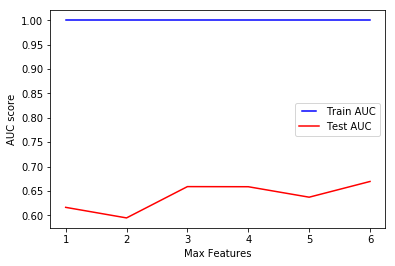

In [89]:
import numpy as np
import matplotlib.pyplot as plt

max_features = list(range(1,X.shape[1]))

trainResult = []
testResult = []
for features in max_features:
    dt4 = DecisionTreeClassifier(max_features=features)
    dt4.fit(Xtrain, ytrain)
    
    trainPred = dt4.predict(Xtrain)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytrain, trainPred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    trainResult.append(rocAUC)
    
    ypred = dt4.predict(Xtest)
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(ytest, ypred)
    rocAUC = auc(falsePositiveRate, truePositiveRate)
    testResult.append(rocAUC)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, trainResult, 'b', label="Train AUC")
line2, = plt.plot(max_features, testResult, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Max Features')
plt.show

In [90]:
#*#*#*#*#*#*#
from sklearn.tree import DecisionTreeClassifier
XTEST = test.drop(['click_id'], axis=1)
modelLower = DecisionTreeClassifier(max_depth=17, max_features=2)
modelHigher = DecisionTreeClassifier(max_depth=17, max_features=4)

modelLower.fit(Xtrain, ytrain)
modelHigher.fit(Xtrain, ytrain)

ypredLower = modelLower.predict(XTEST)
ypredHigher = modelHigher.predict(XTEST)

In [ ]:
outputLower.shape

In [ ]:
ypredLower.shape

# export

In [91]:
#*#*#*#*#*#*#
outputLower = pd.read_csv('sample_submission.csv')
outputHigher = pd.read_csv('sample_submission.csv')

outputLower['click_id'] = test['click_id']
outputLower['is_attributed'] = ypredLower

outputHigher['click_id'] = test['click_id']
outputHigher['is_attributed'] = ypredHigher

In [92]:
#*#*#*#*#*#*#
outputLower['is_attributed'].value_counts()

0    18756866
1       33603
Name: is_attributed, dtype: int64

In [93]:
#*#*#*#*#*#*#
outputHigher['is_attributed'].value_counts()

0    18749925
1       40544
Name: is_attributed, dtype: int64

In [94]:
#*#*#*#*#*#*#
outputLower.to_csv('m3Ls.csv', index=False)
outputHigher.to_csv('m3Hs.csv', index=False)

# **Model with tuned parameters

In [ ]:
XTRAIN = train.drop(['is_attributed'], axis=1)
yTRAIN = train['is_attributed']
XTEST = test.drop(['click_id'], axis=1)

In [ ]:
print(XTRAIN.shape)
print(yTRAIN.shape)

In [ ]:
XTRAIN.dtypes

In [ ]:
yTRAIN.dtypes

In [ ]:
XTEST.shape

In [ ]:
finalModel = DecisionTreeClassifier()

In [ ]:
%time finalModel.fit(XTRAIN, yTRAIN)

In [ ]:
%time ypred = finalModel.predict(XTEST)

# Export model with tuned parameters

In [ ]:
output = pd.read_csv('sample_submission.csv')
output.dtypes

In [ ]:
output['click_id'] = test['click_id']
output['is_attributed'] = yPRED

In [ ]:
output.shape

In [ ]:
output['is_attributed'].value_counts()

In [ ]:
output.to_csv('m3s.csv', index=False)